# Cleaning and Exploring PPP Loan Data: Python

## Project Description 
In this project, we use Python to import data from both Excel and .CSV files from the Small Business Administrations' (SBA) Paycheck Protection Program (PPP). In the first section we cover the process of cleaning the data and preparing it for analytical purposes. Next, during the exploration process we analyze the data utilizing the pandas, NumPy, matplotlib, and seaborn libraries to gain insights.

#### Importing Libraries

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_column',55)

#### Read Data

In [25]:
df=pd.read_csv('public_150k_plus_220930.csv')
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


#### More Concise .info()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
LoanNumber                     968531 non-null int64
DateApproved                   968531 non-null object
SBAOfficeCode                  968531 non-null int64
ProcessingMethod               968531 non-null object
BorrowerName                   968527 non-null object
BorrowerAddress                968517 non-null object
BorrowerCity                   968519 non-null object
BorrowerState                  968518 non-null object
BorrowerZip                    968518 non-null object
LoanStatusDate                 923250 non-null object
LoanStatus                     968531 non-null object
Term                           968531 non-null int64
SBAGuarantyPercentage          968531 non-null int64
InitialApprovalAmount          968531 non-null float64
CurrentApprovalAmount          968531 non-null float64
UndisbursedAmount              968481 non-null float64
FranchiseName             

#### Checking for NULLS

In [27]:
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  45281
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  50
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

#### Retrieve Relevant Records

In [55]:
df=df.loc[df['BorrowerName'].notnull()]
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,...,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,...,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,2020,5,2020.0,11.0
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,...,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,...,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,...,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,...,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968527 entries, 0 to 968530
Data columns (total 53 columns):
LoanNumber                     968527 non-null int64
DateApproved                   968527 non-null object
SBAOfficeCode                  968527 non-null int64
ProcessingMethod               968527 non-null object
BorrowerName                   968527 non-null object
BorrowerAddress                968513 non-null object
BorrowerCity                   968515 non-null object
BorrowerState                  968514 non-null object
BorrowerZip                    968514 non-null object
LoanStatusDate                 923246 non-null object
LoanStatus                     968527 non-null object
Term                           968527 non-null int64
SBAGuarantyPercentage          968527 non-null int64
InitialApprovalAmount          968527 non-null float64
CurrentApprovalAmount          968527 non-null float64
UndisbursedAmount              968477 non-null float64
FranchiseName             

#### Insert DatetimeIndex Columns

In [52]:
df['year_approved']=pd.DatetimeIndex(df['DateApproved']).year
df['month_approved']=pd.DatetimeIndex(df['DateApproved']).month

df['year_forgiven']=pd.DatetimeIndex(df['ForgivenessDate']).year
df['month_forgiven']=pd.DatetimeIndex(df['ForgivenessDate']).month

In [53]:
df.head()


,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,...,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,...,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,2020,5,2020.0,11.0
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,...,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,...,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,...,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,...,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968527 entries, 0 to 968530
Data columns (total 57 columns):
LoanNumber                     968527 non-null int64
DateApproved                   968527 non-null object
SBAOfficeCode                  968527 non-null int64
ProcessingMethod               968527 non-null object
BorrowerName                   968527 non-null object
BorrowerAddress                968513 non-null object
BorrowerCity                   968515 non-null object
BorrowerState                  968514 non-null object
BorrowerZip                    968514 non-null object
LoanStatusDate                 923246 non-null object
LoanStatus                     968527 non-null object
Term                           968527 non-null int64
SBAGuarantyPercentage          968527 non-null int64
InitialApprovalAmount          968527 non-null float64
CurrentApprovalAmount          968527 non-null float64
UndisbursedAmount              968477 non-null float64
FranchiseName             

#### Build FirstRound Dataframe

In [56]:
FirstRound=df.loc[df['ProcessingMethod']=='PPP']
FirstRound.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,...,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,...,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,2020,5,2020.0,11.0
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,...,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,...,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,...,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,...,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0


#### Build SecondRound Dataframe

In [57]:
SecondRound= df.loc[df['ProcessingMethod']=='PPS']
SecondRound.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,...,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
80,1305708310,01/16/2021,1084,PPS,FOUNTAINHEAD DEVELOPMENT INC,1501 Queens Way,Fairbanks,AK,99701-7456,03/10/2022,Paid in Full,60,100,2000000.0,2000000.0,0.0,NaN,3495,Denali State Bank,119 N Cushman St,FAIRBANKS,AK,99701-2879,R,Y,N,Existing or more than 2 years old,...,99701-7456,AK-,140.0,721110.0,Unanswered,Unknown/NotStated,1.0,1999995.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,3495,Denali State Bank,FAIRBANKS,AK,Male Owned,Unanswered,NaN,2020666.67,02/02/2022,2021,1,2022.0,2.0
81,1528398702,03/27/2021,1084,PPS,NORTHERN ENERGY SERVICES LLC,6250 S Airpark Pl,Anchorage,AK,99502-1865,NaN,Exemption 4,60,100,2000000.0,2000000.0,0.0,NaN,116975,Northrim Bank,3111 'C' St,ANCHORAGE,AK,99503,U,N,N,Existing or more than 2 years old,...,99502-1865,AK-,204.0,237310.0,Unanswered,Unknown/NotStated,NaN,2000000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,NaN,NaN,NaN,2021,3,NaN,NaN
82,2340468702,03/28/2021,1084,PPS,WHITTIER SEAFOOD LLC,375 E WHITTIER ST,WHITTIER,AK,99693,NaN,Exemption 4,60,100,2000000.0,2000000.0,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,R,N,N,Existing or more than 2 years old,...,99693,AK-,216.0,114111.0,White,Not Hispanic or Latino,1.0,1999999.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,NaN,NaN,2021,3,NaN,NaN
83,2524238501,02/20/2021,1084,PPS,ALCAN ELECTRICAL AND ENGINEERING INC,6670 Arctic Spur Rd,Anchorage,AK,99518-1548,10/13/2021,Paid in Full,60,100,2000000.0,2000000.0,0.0,NaN,116975,Northrim Bank,3111 'C' St,ANCHORAGE,AK,99503,U,N,N,Existing or more than 2 years old,...,99518-1548,AK-,92.0,238210.0,Unanswered,Unknown/NotStated,1.0,1999998.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,NaN,2011342.47,09/20/2021,2021,2,2021.0,9.0
84,3041178300,01/21/2021,1084,PPS,FAMILY CENTERED SERVICES OF ALASKA INC,1825 Marika Rd,Fairbanks,AK,99709-5521,04/08/2022,Paid in Full,60,100,2000000.0,2000000.0,0.0,NaN,116975,Northrim Bank,3111 'C' St,ANCHORAGE,AK,99503,R,N,N,Existing or more than 2 years old,...,99709-5521,AK-,169.0,624190.0,Unanswered,Unknown/NotStated,NaN,2000000.0,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,Y,2023068.49,03/28/2022,2021,1,2022.0,3.0


# CATEGORICAL VARIABLES


## Univariate

#### Count ProcessingMethod Column

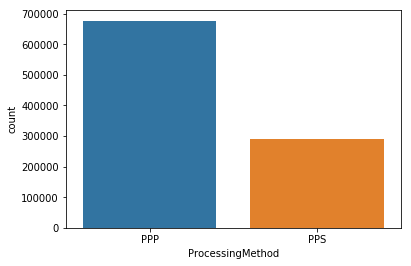

In [58]:
sns.countplot(df['ProcessingMethod'])

#### Count LoanStatus Column

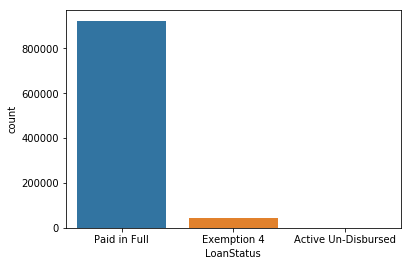

In [59]:
#Lets look at the LoanStatus of the borrowers. We can see that most borrowers PPP loans have been forgiven in full.
sns.countplot(df['LoanStatus'])

#### Count BorrowerState Column

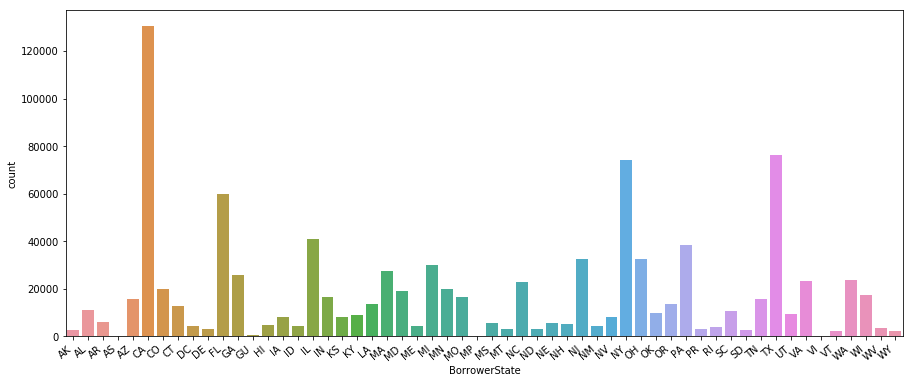

In [60]:
plt.figure(figsize=(15,6))  #this creates an 8 inch wide, 4 inch high
ax=sns.countplot(x="BorrowerState", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#plt.tight_layout()
plt.show()

#### Count Ethnicity Column

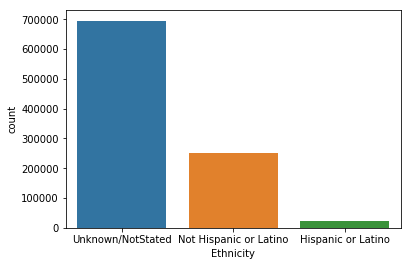

In [61]:
#Lets look at the Ethnicity of the borrowers. We can see that most borrowers ethnicity is unknown. 
sns.countplot(df['Ethnicity'])

#### Count BusinessType Column

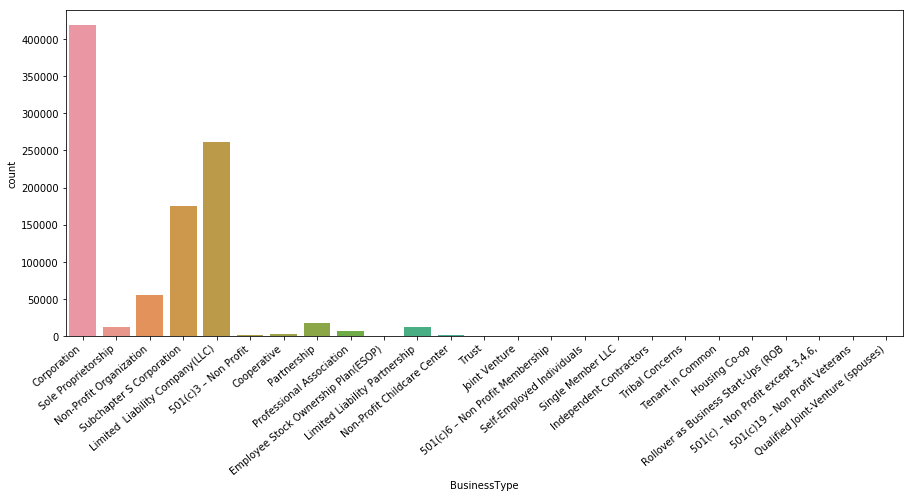

In [62]:
#When we look at "BusinessType" we need to make the graph bigger by levraging plt.figure() and plot the state on the 
# x-axis 

plt.figure(figsize=(15,6))  #8 inch wide by 4 inch high chart
ax=sns.countplot(x="BusinessType", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#plt.tight_layout()
plt.show()

# CATEGORICAL VARIABLES

## Bivariate

#### Plotting Ethnicity vs. Loan Status

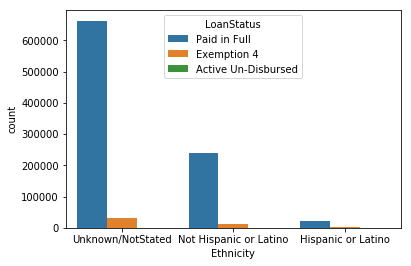

In [63]:
#Plotting Ethnicity Against Loan Status
sns.countplot(x='Ethnicity',hue='LoanStatus', data=df)

#### Crosstab - BorrowerState vs Ethnicity

In [64]:
pd.crosstab(df['BorrowerState'], df['Ethnicity'])

Ethnicity,Hispanic or Latino,Not Hispanic or Latino,Unknown/NotStated
BorrowerState,,,
AK,45,692,1924
AL,49,3230,7633
AR,55,1524,4278
AS,0,1,19
AZ,451,3586,11757
CA,5880,36429,88305
CO,464,5059,14220
CT,167,3295,9430
DC,97,910,3392


#### Crosstab - Year_Approved vs BorrowerState

In [65]:
pd.crosstab(df['year_approved'], df['BorrowerState'])

BorrowerState,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,...,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
year_approved,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,1713,7840,4254,18,11314,87334,13413,8585,2798,2066,41555,18124,289,3180,5953,3315,27320,11853,5884,6440,9061,18206,12843,2874,19881,13724,11491,...,2203,16118,2188,4186,3442,21868,3014,5553,46903,22873,6841,9283,26018,1940,2470,7584,1955,11283,51888,6745,16111,173,1547,15941,12378,2288,1360
2021,948,3072,1603,2,4480,43280,6330,4307,1601,930,18481,7708,154,1800,2342,1101,13494,4747,2318,2738,4607,9267,6135,1311,9920,6004,4859,...,941,6710,1034,1618,1636,10667,1470,2708,27205,9773,3156,4172,12517,1012,1322,3158,740,4586,24296,2549,7157,117,722,7813,4975,1077,779


#### Crosstab - Ethnicity vs LoanStatus

In [66]:
pd.crosstab(df['Ethnicity'], df['LoanStatus'])

LoanStatus,Active Un-Disbursed,Exemption 4,Paid in Full
Ethnicity,,,
Hispanic or Latino,0,1935,21207
Not Hispanic or Latino,7,11468,239109
Unknown/NotStated,5,31878,662918


# NUMERICAL VARIABLES 
## Discrete 

#### Descriptive Summary

In [67]:

df['CurrentApprovalAmount'].describe().astype(int)


count      968527
mean       530622
std        737888
min        150000
25%        200400
50%        295000
75%        539381
max      10000000
Name: CurrentApprovalAmount, dtype: int32

#### Outliers - CurrentApprovalAmount

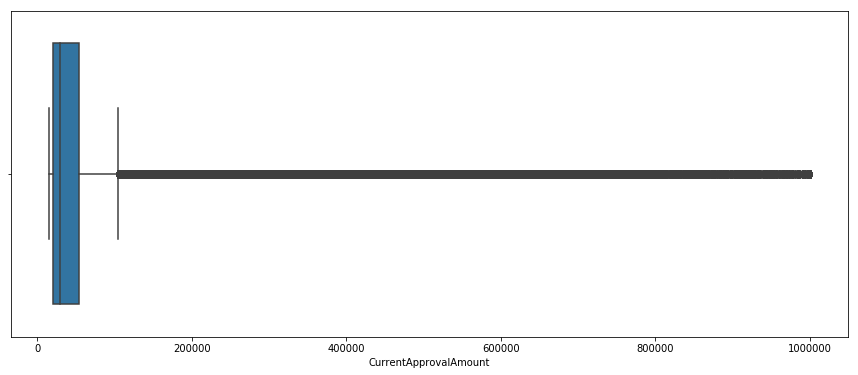

In [68]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['CurrentApprovalAmount']/10)

#### Outliers - LoanStatus vs. CurrentApprovalAmount

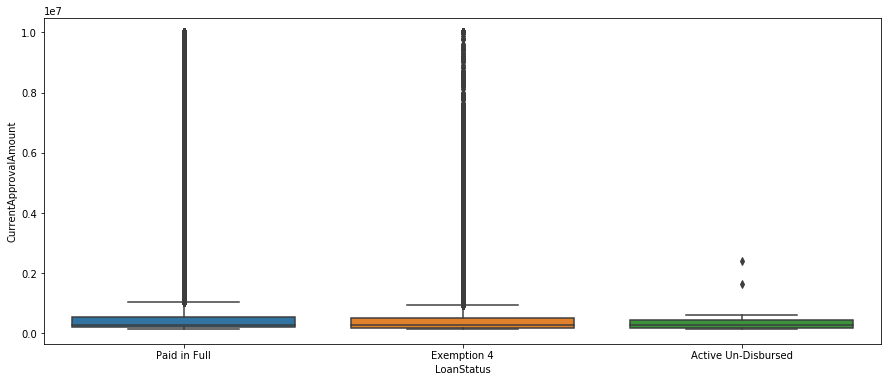

In [69]:
plt.figure(figsize=(15,6))
sns.boxplot(x='LoanStatus', y='CurrentApprovalAmount', data=df)

#### Distribution Analysis

The column is positively skewed.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


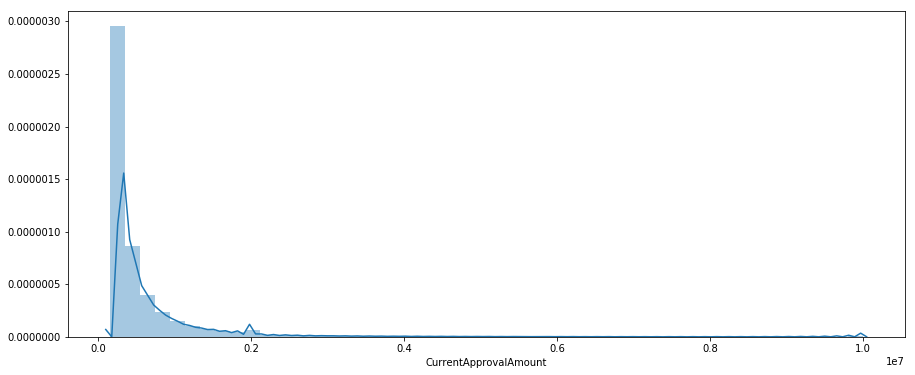

In [70]:
plt.figure(figsize=(15,6))
sns.distplot(df['CurrentApprovalAmount'])

#### Skew

A skewness value of 5.759 confirms that the data is highly positively skewed

In [71]:
df['CurrentApprovalAmount'].skew()

5.75914463155794

#### Kurtosis

A kurtosis value > 3 indicates a distribution that is more peaked than a normal distribution.

In [72]:
df['CurrentApprovalAmount'].kurt()

48.97385320083703

#### Correlation

The correlation matrix shows a strong correlation between "ForgivenessAmount" and the "InitialApprovalAmount", "CurrentApprovalAmount "and "PAYROLL_PROCEED" columns all showing a correlation coefficient of (.99).

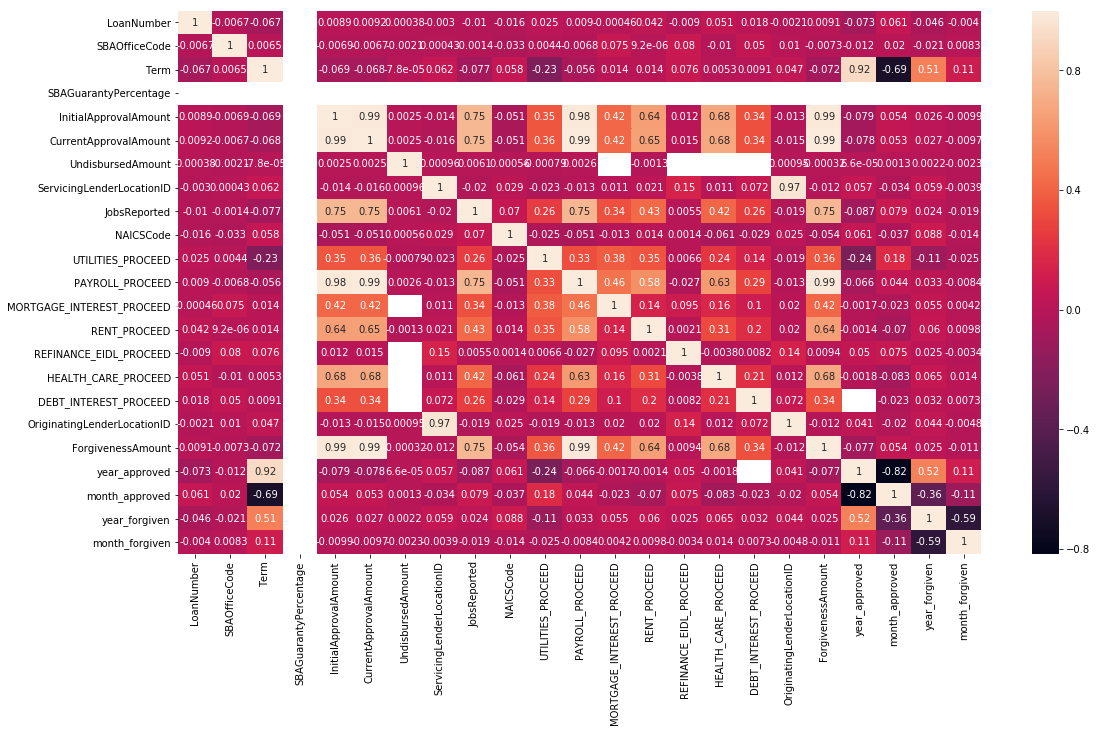

In [73]:
matrix=df.corr()
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(matrix, annot=True)